# MLP Training Notebook

This notebook trains the MLP model defined in `model_art.py` using the artificial datasets. 
- Training data: `dataset1_train.csv`
- Validation data: `dataset1_test.csv`

The learning rate and batch size are configurable parameters.

## 1. Import Required Libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Import the MLP model
from model_art import BackBone, Head, ClassificationModel

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

/Users/giovanniattina/miniconda3/envs/task-vectors/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/giovanniattina/miniconda3/envs/task-vectors/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Using device: cpu


## 2. Load and Preprocess Data

In [2]:
# Load training data
train_data = pd.read_csv('artificial_datasets/dataset1_train.csv')
print(f"Training data shape: {train_data.shape}")

# Load validation data
val_data = pd.read_csv('artificial_datasets/dataset1_test.csv')
print(f"Validation data shape: {val_data.shape}")

# Display first few rows
print("\nTraining data sample:")
print(train_data.head())

# Check data info
print(f"\nFeature columns: {train_data.columns[:-1].tolist()}")
print(f"Target column: {train_data.columns[-1]}")
print(f"Unique target values: {sorted(train_data['target'].unique())}")

Training data shape: (8000, 513)
Validation data shape: (2000, 513)

Training data sample:
          0         1         2         3         4         5         6  \
0 -3.807910 -1.884446  0.936301 -1.083392  0.440450 -0.182885  0.391830   
1 -0.316092  1.422871  1.031887 -0.259722 -0.399938  1.284333  0.088813   
2 -4.270792  0.720159 -1.875514  0.962766  0.375248 -0.459635  0.765948   
3 -5.874469  0.896157  0.830854  0.349346  1.418263  0.429201  0.407743   
4 -1.531516  1.339223  1.338889 -0.644527 -0.641790  0.456020 -0.680140   

          7         8         9  ...       503       504       505       506  \
0 -0.480438  0.433825 -0.947424  ...  1.273576 -1.180571  0.229974 -0.983432   
1  0.084595 -1.366232 -0.190655  ...  0.816609  1.781373 -0.941531  0.557904   
2 -1.624893  0.912461 -0.002865  ... -1.345892  0.960353 -2.274141  0.237136   
3 -1.212214  0.897039  0.235534  ... -0.405024 -0.740908 -2.205221 -1.361321   
4  1.036491 -1.637399  1.084228  ... -0.732845  0.658566 -

In [3]:
# Separate features and targets
X_train = train_data.iloc[:, :-1].values  # All columns except the last one
y_train = train_data.iloc[:, -1].values   # Last column (target)

X_val = val_data.iloc[:, :-1].values
y_val = val_data.iloc[:, -1].values

# Convert to torch tensors
X_train_tensor = torch.FloatTensor(X_train).to(device)
y_train_tensor = torch.LongTensor(y_train).to(device)

X_val_tensor = torch.FloatTensor(X_val).to(device)
y_val_tensor = torch.LongTensor(y_val).to(device)

print(f"Training features shape: {X_train_tensor.shape}")
print(f"Training targets shape: {y_train_tensor.shape}")
print(f"Validation features shape: {X_val_tensor.shape}")
print(f"Validation targets shape: {y_val_tensor.shape}")

# Get dataset dimensions
input_dim = X_train_tensor.shape[1]
num_classes = len(torch.unique(y_train_tensor))
print(f"\nInput dimension: {input_dim}")
print(f"Number of classes: {num_classes}")

Training features shape: torch.Size([8000, 512])
Training targets shape: torch.Size([8000])
Validation features shape: torch.Size([2000, 512])
Validation targets shape: torch.Size([2000])

Input dimension: 512
Number of classes: 10


## 3. Define Training Parameters

You can modify these parameters to experiment with different training configurations:

In [12]:
# Training Parameters (modify these as needed)
LEARNING_RATE = 0.0001
BATCH_SIZE = 32
NUM_EPOCHS = 200

print(f"Learning Rate: {LEARNING_RATE}")
print(f"Batch Size: {BATCH_SIZE}")
print(f"Number of Epochs: {NUM_EPOCHS}")

# Create DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

print(f"\nNumber of training batches: {len(train_loader)}")
print(f"Number of validation batches: {len(val_loader)}")

Learning Rate: 0.0001
Batch Size: 32
Number of Epochs: 200

Number of training batches: 250
Number of validation batches: 63


## 4. Initialize Model

In [ ]:
# Initialize the MLP model
backbone = BackBone(input_dim=input_dim).to(device)
head = Head(input_dim=backbone.get_output_dim(), output_dim=num_classes).to(device)

# Combine backbone and head into a single model
model = ClassificationModel(backbone=backbone, head=head).to(device)


# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = 

# Print model architecture
print("Model Architecture:")
print(model)

# Count parameters
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"\nTotal parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")

Model Architecture:
ClassificationModel(
  (backbone): BackBone(
    (block1): MLPBlock(
      (block): Sequential(
        (0): Linear(in_features=512, out_features=512, bias=True)
        (1): ReLU()
        (2): Linear(in_features=512, out_features=512, bias=True)
        (3): ReLU()
        (4): Linear(in_features=512, out_features=512, bias=True)
        (5): ReLU()
        (6): Linear(in_features=512, out_features=512, bias=True)
        (7): ReLU()
        (8): Linear(in_features=512, out_features=512, bias=True)
        (9): ReLU()
      )
    )
    (transition): Linear(in_features=512, out_features=256, bias=True)
    (block2): MLPBlock(
      (block): Sequential(
        (0): Linear(in_features=256, out_features=256, bias=True)
        (1): ReLU()
        (2): Linear(in_features=256, out_features=256, bias=True)
        (3): ReLU()
        (4): Linear(in_features=256, out_features=256, bias=True)
        (5): ReLU()
        (6): Linear(in_features=256, out_features=256, bias=

## 5. Train the Model

In [14]:
# Training loop
train_losses = []
val_losses = []
val_accuracies = []

print("Starting training...")
print("-" * 50)

for epoch in range(NUM_EPOCHS):
    # Training phase
    model.train()
    epoch_train_loss = 0.0
    
    for batch_idx, (data, targets) in enumerate(train_loader):
        # Forward pass
        outputs = model(data)
        loss = criterion(outputs, targets)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_train_loss += loss.item()
    
    # Calculate average training loss
    avg_train_loss = epoch_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    
    # Validation phase
    model.eval()
    epoch_val_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    
    with torch.no_grad():
        for data, targets in val_loader:
            outputs = model(data)
            loss = criterion(outputs, targets)
            epoch_val_loss += loss.item()
            
            # Calculate accuracy
            _, predicted = torch.max(outputs.data, 1)
            total_predictions += targets.size(0)
            correct_predictions += (predicted == targets).sum().item()
    
    # Calculate averages
    avg_val_loss = epoch_val_loss / len(val_loader)
    val_accuracy = 100.0 * correct_predictions / total_predictions
    
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)
    
    # Print progress
    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f"Epoch [{epoch+1:3d}/{NUM_EPOCHS}] | "
              f"Train Loss: {avg_train_loss:.4f} | "
              f"Val Loss: {avg_val_loss:.4f} | "
              f"Val Accuracy: {val_accuracy:.2f}%")
    

print("-" * 50)
print("Training completed!")
print(f"Final validation accuracy: {val_accuracies[-1]:.2f}%")

Starting training...
--------------------------------------------------
Epoch [  1/200] | Train Loss: 2.2624 | Val Loss: 2.1880 | Val Accuracy: 15.90%
Epoch [ 10/200] | Train Loss: 0.9719 | Val Loss: 3.9057 | Val Accuracy: 20.05%
Epoch [ 20/200] | Train Loss: 0.3201 | Val Loss: 8.1563 | Val Accuracy: 22.50%
Epoch [ 30/200] | Train Loss: 0.2154 | Val Loss: 8.2084 | Val Accuracy: 23.50%
Epoch [ 40/200] | Train Loss: 0.1674 | Val Loss: 8.2797 | Val Accuracy: 26.20%
Epoch [ 50/200] | Train Loss: 0.1437 | Val Loss: 7.4166 | Val Accuracy: 28.70%
Epoch [ 60/200] | Train Loss: 0.1053 | Val Loss: 6.2011 | Val Accuracy: 32.30%
Epoch [ 70/200] | Train Loss: 0.0773 | Val Loss: 6.6250 | Val Accuracy: 34.60%
Epoch [ 80/200] | Train Loss: 0.0909 | Val Loss: 5.2489 | Val Accuracy: 37.65%
Epoch [ 90/200] | Train Loss: 0.0520 | Val Loss: 5.2213 | Val Accuracy: 38.70%
Epoch [100/200] | Train Loss: 0.0484 | Val Loss: 5.1414 | Val Accuracy: 41.35%
Epoch [110/200] | Train Loss: 0.0506 | Val Loss: 4.5977 | V

## 6. Validate the Model

Let's perform a detailed evaluation of the trained model:

In [15]:
# Detailed evaluation on validation set
model.eval()
all_predictions = []
all_targets = []
val_loss_total = 0.0

with torch.no_grad():
    for data, targets in val_loader:
        outputs = model(data)
        loss = criterion(outputs, targets)
        val_loss_total += loss.item()
        
        _, predicted = torch.max(outputs.data, 1)
        all_predictions.extend(predicted.cpu().numpy())
        all_targets.extend(targets.cpu().numpy())

# Calculate metrics
final_val_loss = val_loss_total / len(val_loader)
final_accuracy = accuracy_score(all_targets, all_predictions)

print(f"Final Validation Results:")
print(f"  Loss: {final_val_loss:.4f}")
print(f"  Accuracy: {final_accuracy:.4f} ({final_accuracy*100:.2f}%)")

# Class-wise performance
from sklearn.metrics import classification_report, confusion_matrix
print(f"\nClassification Report:")
print(classification_report(all_targets, all_predictions))

print(f"\nConfusion Matrix:")
conf_matrix = confusion_matrix(all_targets, all_predictions)
print(conf_matrix)

# Class distribution
print(f"\nClass distribution in validation set:")
unique, counts = np.unique(all_targets, return_counts=True)
for cls, count in zip(unique, counts):
    print(f"  Class {cls}: {count} samples ({count/len(all_targets)*100:.1f}%)")

Final Validation Results:
  Loss: 5.9690
  Accuracy: 0.4795 (47.95%)

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.54      0.48       200
           1       0.41      0.58      0.48       199
           2       0.56      0.50      0.53       199
           3       0.52      0.47      0.49       199
           4       0.34      0.49      0.40       199
           5       0.70      0.44      0.54       201
           6       0.49      0.61      0.54       200
           7       0.48      0.41      0.44       201
           8       0.50      0.42      0.45       201
           9       0.61      0.36      0.45       201

    accuracy                           0.48      2000
   macro avg       0.50      0.48      0.48      2000
weighted avg       0.50      0.48      0.48      2000


Confusion Matrix:
[[107  17   9  11  23   2  11  10   7   3]
 [ 13 115   9   8  24   1   4   7  15   3]
 [ 11   9  99  17  17   2  14  11   9  10]


## 7. Plot Training and Validation Metrics

Visualize the training progress and model performance:

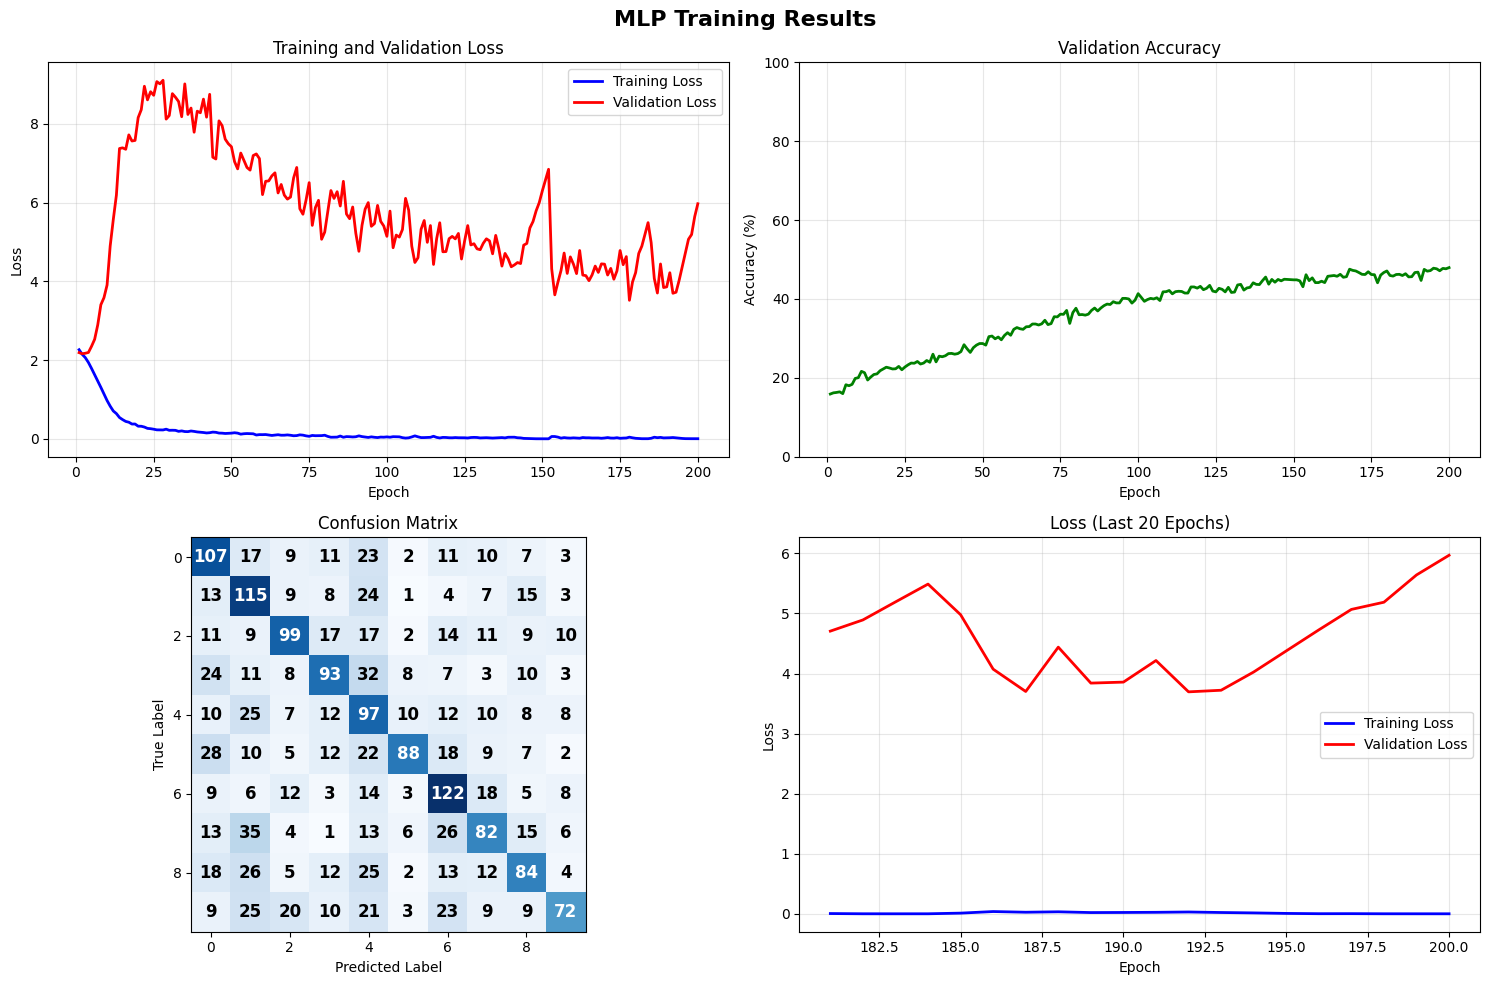


TRAINING SUMMARY
Learning Rate: 0.0001
Batch Size: 32
Number of Epochs: 200
Input Dimension: 512
Number of Classes: 10
Training Samples: 8000
Validation Samples: 2000
Model Parameters: 1,807,754

Final Training Loss: 0.0024
Final Validation Loss: 5.9690
Final Validation Accuracy: 47.95%
Best Validation Accuracy: 47.95% (Epoch 200)


In [16]:
# Create comprehensive plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('MLP Training Results', fontsize=16, fontweight='bold')

# Plot 1: Training and Validation Loss
axes[0, 0].plot(range(1, NUM_EPOCHS + 1), train_losses, 'b-', label='Training Loss', linewidth=2)
axes[0, 0].plot(range(1, NUM_EPOCHS + 1), val_losses, 'r-', label='Validation Loss', linewidth=2)
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].set_title('Training and Validation Loss')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Validation Accuracy
axes[0, 1].plot(range(1, NUM_EPOCHS + 1), val_accuracies, 'g-', linewidth=2)
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy (%)')
axes[0, 1].set_title('Validation Accuracy')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_ylim([0, 100])

# Plot 3: Confusion Matrix Heatmap
from matplotlib.colors import LinearSegmentedColormap
im = axes[1, 0].imshow(conf_matrix, interpolation='nearest', cmap='Blues')
axes[1, 0].set_title('Confusion Matrix')
axes[1, 0].set_xlabel('Predicted Label')
axes[1, 0].set_ylabel('True Label')

# Add text annotations to confusion matrix
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        axes[1, 0].text(j, i, format(conf_matrix[i, j], 'd'),
                       ha="center", va="center",
                       color="white" if conf_matrix[i, j] > thresh else "black",
                       fontsize=12, fontweight='bold')

# Plot 4: Loss Comparison (Last 20 epochs)
last_n = min(20, NUM_EPOCHS)
axes[1, 1].plot(range(NUM_EPOCHS - last_n + 1, NUM_EPOCHS + 1), 
                train_losses[-last_n:], 'b-', label='Training Loss', linewidth=2)
axes[1, 1].plot(range(NUM_EPOCHS - last_n + 1, NUM_EPOCHS + 1), 
                val_losses[-last_n:], 'r-', label='Validation Loss', linewidth=2)
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].set_title(f'Loss (Last {last_n} Epochs)')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\n" + "="*60)
print(f"TRAINING SUMMARY")
print(f"="*60)
print(f"Learning Rate: {LEARNING_RATE}")
print(f"Batch Size: {BATCH_SIZE}")
print(f"Number of Epochs: {NUM_EPOCHS}")
print(f"Input Dimension: {input_dim}")
print(f"Number of Classes: {num_classes}")
print(f"Training Samples: {len(X_train_tensor)}")
print(f"Validation Samples: {len(X_val_tensor)}")
print(f"Model Parameters: {trainable_params:,}")
print(f"\nFinal Training Loss: {train_losses[-1]:.4f}")
print(f"Final Validation Loss: {val_losses[-1]:.4f}")
print(f"Final Validation Accuracy: {val_accuracies[-1]:.2f}%")
print(f"Best Validation Accuracy: {max(val_accuracies):.2f}% (Epoch {val_accuracies.index(max(val_accuracies))+1})")
print(f"="*60)

## 8. Save Model and Experiment Results (Optional)

Save the trained model and experiment results for future use:

In [10]:
# Save the trained model
import os
from datetime import datetime

# Create checkpoints directory if it doesn't exist
os.makedirs('artificial_checkpoints', exist_ok=True)

In [11]:
#save model layers and head in two different files
torch.save(model.state_dict(), 'artificial_checkpoints/mlp_dataset1_model.pth')
torch.save(model.head.state_dict(), 'artificial_checkpoints/mlp_dataset1_head.pth')

In [12]:
torch.save(model.state_dict(), 'artificial_checkpoints/mlp_model.pth')

In [19]:
# Save the trained model
import os
from datetime import datetime

# Create artificial_checkpoints directory if it doesn't exist
os.makedirs('artificial_checkpoints', exist_ok=True)

# Generate timestamp for unique filename
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
model_filename = f"artificial_checkpoints/mlp_model.pth"

# Save model state dict and training info
torch.save({
    'state_dict': model.backbone.state_dict(),
    'head_state_dict': model.head.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'model_config': {
        'input_dim': input_dim,
        'output_dim': num_classes
    },
    'training_config': {
        'learning_rate': LEARNING_RATE,
        'batch_size': BATCH_SIZE,
        'num_epochs': NUM_EPOCHS
    },
    'training_history': {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'val_accuracies': val_accuracies
    },
    'final_metrics': {
        'final_train_loss': train_losses[-1],
        'final_val_loss': val_losses[-1],
        'final_val_accuracy': val_accuracies[-1],
        'best_val_accuracy': max(val_accuracies)
    }
}, model_filename)

print(f"Model saved to: {model_filename}")

# Save experiment log
log_filename = f"artificial_checkpoints/experiment_log_{timestamp}.txt"
with open(log_filename, 'w') as f:
    f.write("MLP Training Experiment Log\n")
    f.write("=" * 40 + "\n")
    f.write(f"Timestamp: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
    f.write(f"Learning Rate: {LEARNING_RATE}\n")
    f.write(f"Batch Size: {BATCH_SIZE}\n")
    f.write(f"Number of Epochs: {NUM_EPOCHS}\n")
    f.write(f"Input Dimension: {input_dim}\n")
    f.write(f"Number of Classes: {num_classes}\n")
    f.write(f"Training Samples: {len(X_train_tensor)}\n")
    f.write(f"Validation Samples: {len(X_val_tensor)}\n")
    f.write(f"Model Parameters: {trainable_params:,}\n")
    f.write(f"\nFinal Results:\n")
    f.write(f"Training Loss: {train_losses[-1]:.4f}\n")
    f.write(f"Validation Loss: {val_losses[-1]:.4f}\n")
    f.write(f"Validation Accuracy: {val_accuracies[-1]:.2f}%\n")
    f.write(f"Best Validation Accuracy: {max(val_accuracies):.2f}%\n")

print(f"Experiment log saved to: {log_filename}")
print("\nTo load the model later, use:")
print(f"checkpoint = torch.load('{model_filename}')")
print("model = MLP(checkpoint['model_config']['input_dim'], checkpoint['model_config']['output_dim'])")
print("model.load_state_dict(checkpoint['model_state_dict'])")

Model saved to: artificial_checkpoints/mlp_model.pth
Experiment log saved to: artificial_checkpoints/experiment_log_20250724_182520.txt

To load the model later, use:
checkpoint = torch.load('artificial_checkpoints/mlp_model.pth')
model = MLP(checkpoint['model_config']['input_dim'], checkpoint['model_config']['output_dim'])
model.load_state_dict(checkpoint['model_state_dict'])


In [14]:
torch.save(model.head.state_dict(), f'artificial_checkpoints/mlp_model_head_{timestamp}.pth')